# **Employees DataSet**

**Importing Libraries**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
idf = pd.read_csv('/content/Employee.csv')

In [5]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [6]:
df.shape

(4653, 9)

In [7]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

# **Exploratory Data Analysis**

In [17]:
sns.set(style='whitegrid')
colors = ['#FF0606', '#FFF406']

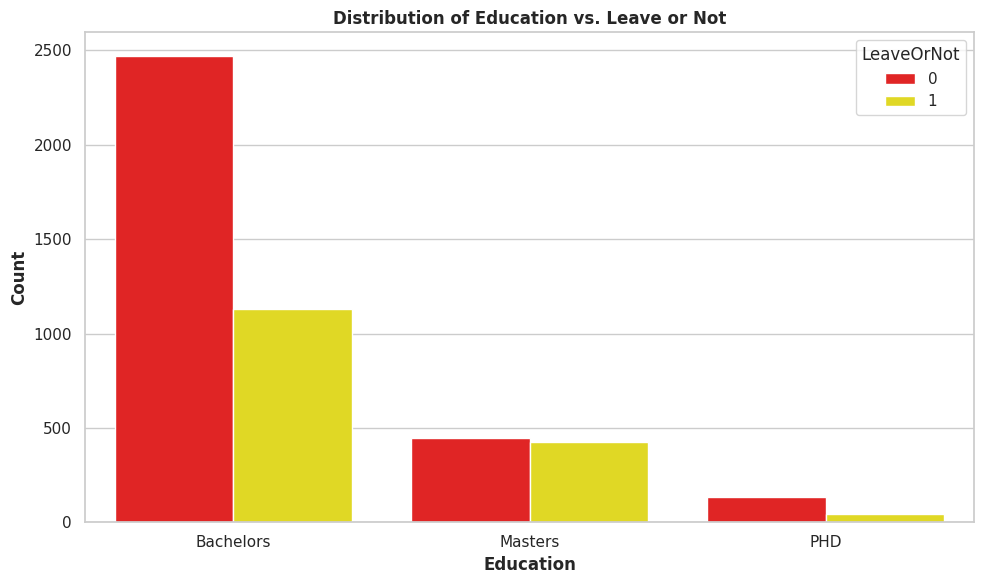

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(data=df, x='Education', hue='LeaveOrNot', ax=ax, palette=colors)
ax.set_title("Distribution of Education vs. Leave or Not", fontweight='bold')
ax.set_xlabel("Education", fontweight='bold')
ax.set_ylabel("Count", fontweight='bold')

plt.tight_layout()
plt.show()

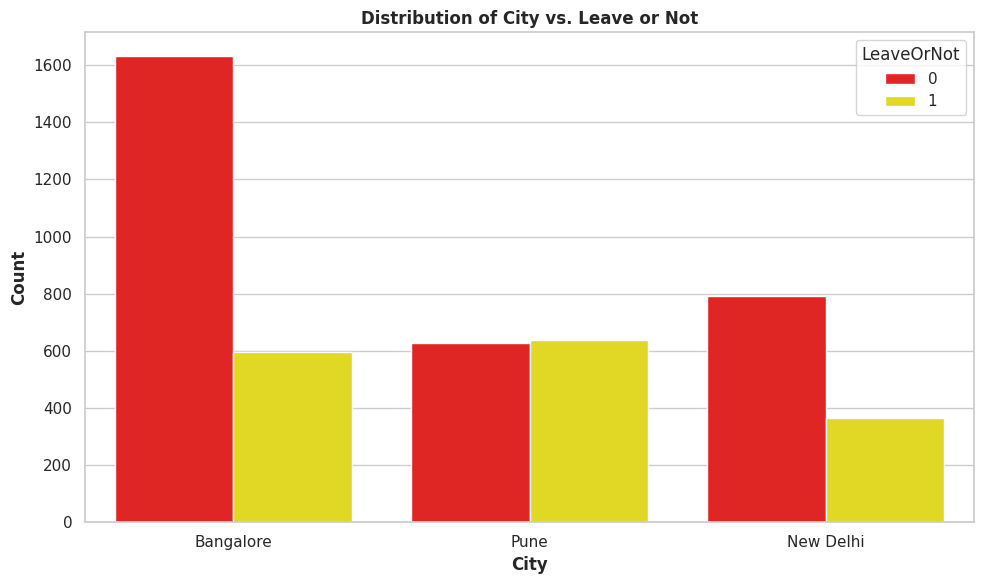

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(data=df, x='City', hue='LeaveOrNot', ax=ax, palette=colors)
ax.set_title("Distribution of City vs. Leave or Not", fontweight='bold')
ax.set_xlabel("City", fontweight='bold')
ax.set_ylabel("Count", fontweight='bold')

plt.tight_layout()
plt.show()

<ipython-input-23-0518c1397d32>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Age', kde=True, ax=ax, palette=colors)


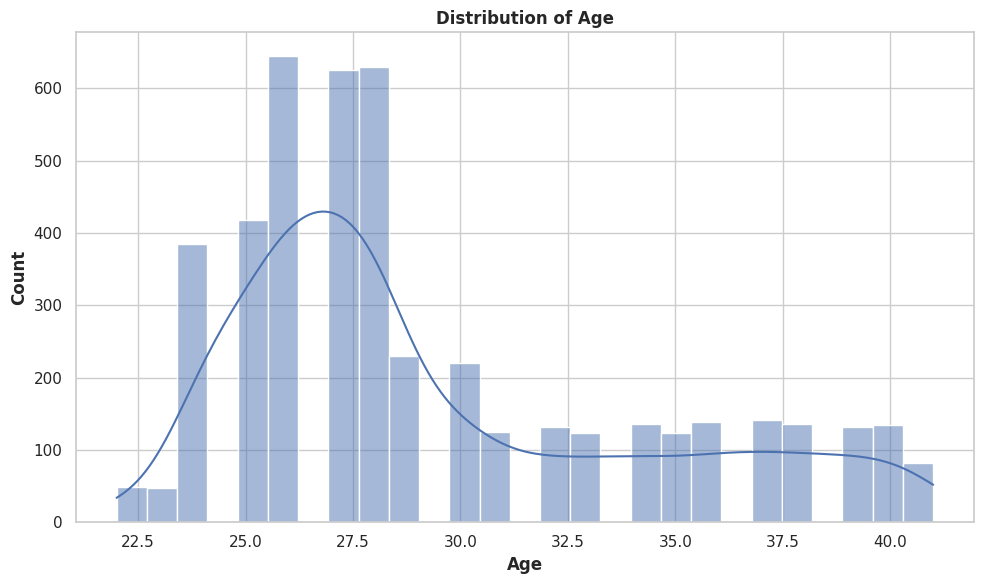

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(data=df, x='Age', kde=True, ax=ax, palette=colors)
ax.set_title("Distribution of Age", fontweight='bold')
ax.set_xlabel("Age", fontweight='bold')
ax.set_ylabel("Count", fontweight='bold')

plt.tight_layout()
plt.show()

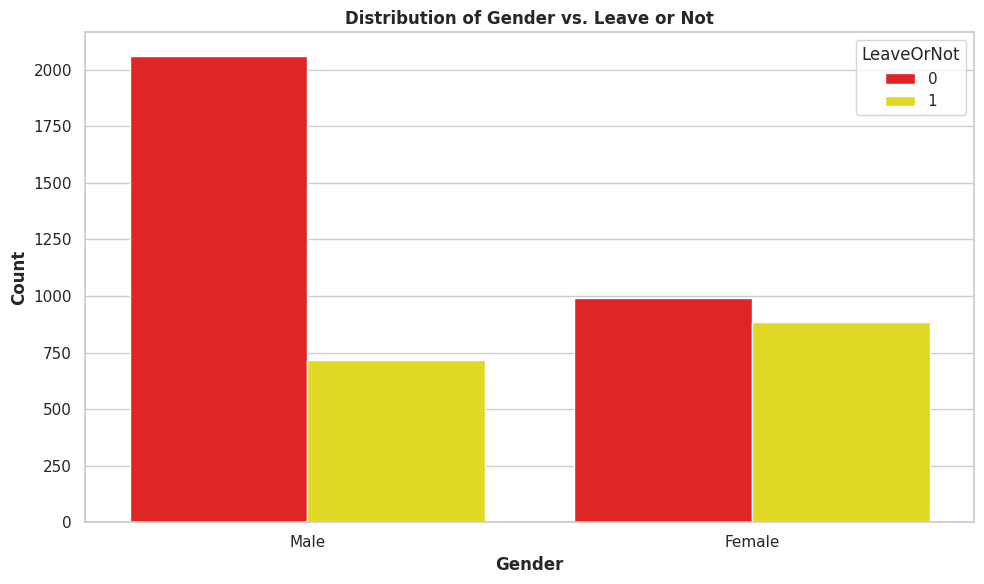

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(data=df, x='Gender', hue='LeaveOrNot', ax=ax, palette=colors)
ax.set_title("Distribution of Gender vs. Leave or Not", fontweight='bold')
ax.set_xlabel("Gender", fontweight='bold')
ax.set_ylabel("Count", fontweight='bold')

plt.tight_layout()
plt.show()

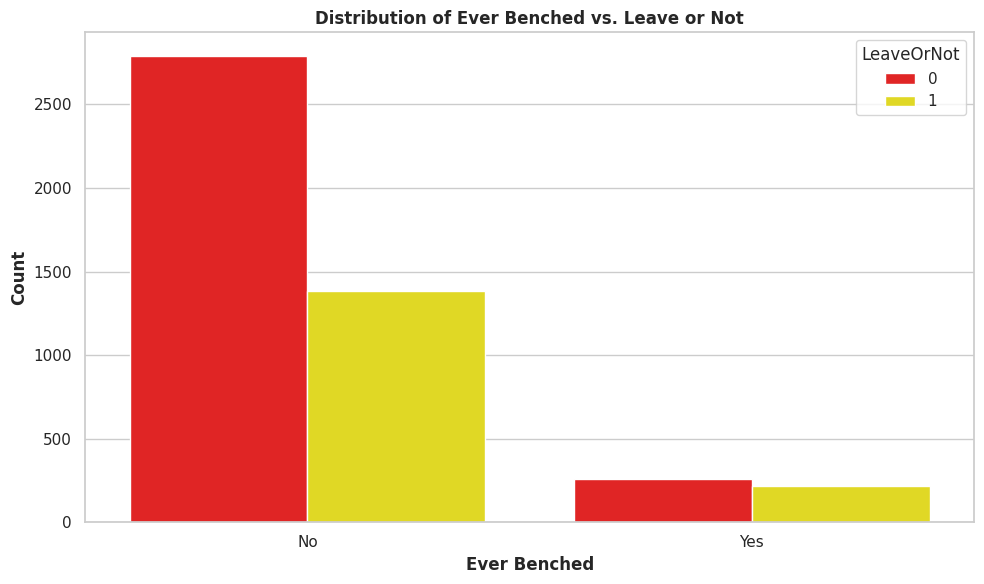

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(data=df, x='EverBenched', hue='LeaveOrNot', ax=ax, palette=colors)
ax.set_title("Distribution of Ever Benched vs. Leave or Not", fontweight='bold')
ax.set_xlabel("Ever Benched", fontweight='bold')
ax.set_ylabel("Count", fontweight='bold')

plt.tight_layout()
plt.show()

# **Applying ML Model**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [30]:
X = df[['Education', 'City', 'PaymentTier', 'Age', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain']]
y = df['LeaveOrNot']

In [31]:
X = pd.get_dummies(X, columns=['Education', 'City', 'Gender', 'EverBenched'], drop_first=True)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
y_pred = clf.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [36]:
print(f"Accuracy: {accuracy:.2f}")
print(report)

Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       610
           1       0.77      0.49      0.60       321

    accuracy                           0.77       931
   macro avg       0.77      0.71      0.72       931
weighted avg       0.77      0.77      0.76       931

